In [312]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import os
import urllib
from IPython.display import display
plt.style.use('ggplot')
from matplotlib import pyplot as plt, font_manager
import matplotlib.ticker as ticker
pd.set_option('precision',4) #小数点の表示
#pd.reset_option("precision")


# https://qiita.com/hagino3000/items/1b54acc01483ccd0ac72
import matplotlib
matplotlib.rcParams.get('font.family')

import matplotlib.font_manager as fm
fm.findSystemFonts()


font_manager._rebuild()
if os.name == 'nt':
    # OSがWindowsの場合、win32FontDirectory()が利⽤できます。
    font_dir = font_manager.win32FontDirectory()
else:
    # OSがmacOSの場合はディレクトリを指定してください。
    # パスに含まれるユーザ名は環境に合わせて変更してください。
    font_dir = '/Users/kenji/Library/Fonts/'
#     font_dir = '/usr/share/fonts/'
    font_path = os.path.join(font_dir, 'SourceHanCodeJP-Regular.otf')
#     font_path = os.path.join(font_dir, 'ipag.ttf')
font = font_manager.FontProperties(fname=font_path, size=14)

!jupyter nbextension enable vim_binding/vim_binding


Enabling notebook extension vim_binding/vim_binding...
      - Validating: OK


In [313]:
base_url = os.path.join(os.getcwd(), 'data')
print (base_url)

/home/ec2-user/SageMaker/globis_programs/data


In [314]:
!ls /home/ec2-user/SageMaker/globis_programs/data

Day4_num_of_convenience.xlsx
QAB_Day11_CASE_038-EZ6-902_edit.xlsx
QAB_Day1_CASE_138-EZ4-823_edit.xlsx
QAB_Day1_TXT_138-EZ12-1377_edit2.xlsx
QAB_Day1_TXT_138-EZ12-1377_edit.xlsx
QAB_Day3_CASE_4568_edit.xlsx
sales_cost.png
セブンイレブン_コンビニ_StatsData_20190203123953.xlsx


In [315]:
import openpyxl

# ブックを取得
exBook= openpyxl.load_workbook("{0}/QAB_Day11_CASE_038-EZ6-902_edit.xlsx".format(base_url))
# シートを取得 
exBook.sheetnames

['Exhibit 1']

In [316]:

df = pd.read_excel("{0}/QAB_Day11_CASE_038-EZ6-902_edit.xlsx".format(base_url)
                   ,skiprows=0,index_col=False, encoding='latin-1',sheet_name='Exhibit 1').dropna(subset=['Years in operation'])
                   

df

,Store,Area Manager (Ikeda or Sato),Years in operation,AM’s evaluation of Store Manager’s training of subordinates (out of 10),AM’s evaluation of Store Manager’s analysis ability (out of 10),AM’s evaluation of Store Manager’s strength of mindset (out of 10),AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),Store space (sq. meters),"Land cost (10,000 yen/sq meters)",Distance to nearest station (in minutes),Population in trading zone,"Average annual household income in trading zone (10,000 yen)",No. of competitor stores (indep-endent),No. of competitor stores (franchise or chain),"Daily sales (1,000 yen)","Daily gross profit (1,000 yen)"
0,A,Ikeda,12.0,6.0,6.0,5.5,6.0,29.5,26.0,7.0,24000.0,900.0,8.0,1.0,368.75,177.00
1,B,Ikeda,5.0,6.0,6.5,7.0,5.0,36.5,28.8,3.5,18000.0,850.0,6.0,0.0,401.50,233.60
2,C,Ikeda,6.0,6.0,5.0,7.5,3.0,40.0,20.8,10.0,18500.0,800.0,3.0,1.0,328.00,224.00
3,D,Ikeda,5.0,4.5,4.5,4.5,2.0,20.0,23.8,6.0,15500.0,850.0,2.0,2.0,138.00,96.00
4,E,Ikeda,5.0,7.5,4.5,6.0,7.0,34.0,24.0,9.0,16000.0,850.0,5.0,1.0,357.00,214.20
5,F,Ikeda,5.0,4.5,6.0,7.5,3.0,36.0,30.9,7.0,20000.0,1000.0,5.0,2.0,378.00,223.20
6,G,Ikeda,7.0,6.0,3.5,5.5,8.0,28.0,18.8,12.0,18500.0,600.0,4.0,3.0,274.40,162.40
7,H,Ikeda,7.0,6.5,4.0,7.5,6.0,37.0,20.5,15.0,18500.0,650.0,4.0,3.0,277.50,214.60
8,I,Ikeda,5.0,2.0,2.0,8.0,1.0,32.0,19.8,5.5,15500.0,550.0,4.0,0.0,160.00,121.60
9,J,Ikeda,4.0,5.5,1.0,6.0,5.0,35.0,19.8,7.5,16500.0,650.0,3.0,2.0,280.00,192.50


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 16 columns):
Store                                                                        20 non-null object
Area Manager (Ikeda or Sato)                                                 20 non-null object
Years in operation                                                           20 non-null float64
AM’s evaluation of Store Manager’s training of subordinates (out of 10)      20 non-null float64
AM’s evaluation of Store Manager’s analysis ability (out of 10)              20 non-null float64
AM’s evaluation of Store Manager’s strength of mindset (out of 10)           20 non-null float64
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10)    20 non-null float64
Store space (sq. meters)                                                     20 non-null float64
Land cost (10,000 yen/sq meters)                                             20 non-null float64
Distance to nearest statio

In [318]:
from IPython.display import display

import numpy as np
for x in np.arange(0,df.shape[1],5):
    display (df.iloc[0:5,x:x+5])

,Store,Area Manager (Ikeda or Sato),Years in operation,AM’s evaluation of Store Manager’s training of subordinates (out of 10),AM’s evaluation of Store Manager’s analysis ability (out of 10)
0,A,Ikeda,12.0,6.0,6.0
1,B,Ikeda,5.0,6.0,6.5
2,C,Ikeda,6.0,6.0,5.0
3,D,Ikeda,5.0,4.5,4.5
4,E,Ikeda,5.0,7.5,4.5


,AM’s evaluation of Store Manager’s strength of mindset (out of 10),AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),Store space (sq. meters),"Land cost (10,000 yen/sq meters)",Distance to nearest station (in minutes)
0,5.5,6.0,29.5,26.0,7.0
1,7.0,5.0,36.5,28.8,3.5
2,7.5,3.0,40.0,20.8,10.0
3,4.5,2.0,20.0,23.8,6.0
4,6.0,7.0,34.0,24.0,9.0


,Population in trading zone,"Average annual household income in trading zone (10,000 yen)",No. of competitor stores (indep-endent),No. of competitor stores (franchise or chain),"Daily sales (1,000 yen)"
0,24000.0,900.0,8.0,1.0,368.75
1,18000.0,850.0,6.0,0.0,401.50
2,18500.0,800.0,3.0,1.0,328.00
3,15500.0,850.0,2.0,2.0,138.00
4,16000.0,850.0,5.0,1.0,357.00


,"Daily gross profit (1,000 yen)"
0,177.0
1,233.6
2,224.0
3,96.0
4,214.2


In [319]:
# https://stackoverflow.com/questions/33042633/selecting-last-n-columns-and-excluding-last-n-columns-in-dataframe
# 最終行を取得
df.iloc[:,-2:].head()

,"Daily sales (1,000 yen)","Daily gross profit (1,000 yen)"
0,368.75,177.0
1,401.50,233.6
2,328.00,224.0
3,138.00,96.0
4,357.00,214.2


In [320]:
# ?scatter_matrix

In [321]:
# pd.get_dummies(df_scatter['Area Manager'])['Ikeda']

In [322]:
# scatter_matrix.reshape(-1)
# df_scatter.dtypes

,Area Manager (Ikeda or Sato),Years in operation,AM’s evaluation of Store Manager’s training of subordinates (out of 10),AM’s evaluation of Store Manager’s analysis ability (out of 10),"Daily sales (1,000 yen)","Daily gross profit (1,000 yen)"
0,Ikeda,12.0,6.0,6.0,368.75,177.0
1,Ikeda,5.0,6.0,6.5,401.50,233.6
2,Ikeda,6.0,6.0,5.0,328.00,224.0
3,Ikeda,5.0,4.5,4.5,138.00,96.0
4,Ikeda,5.0,7.5,4.5,357.00,214.2


Index(['Area Manager (Ikeda or Sato)', 'Years in operation',
       'AM’s evaluation of Store Manager’s training of subordinates (out of 10)',
       'AM’s evaluation of Store Manager’s analysis ability (out of 10)',
       'Daily sales (1,000 yen)', 'Daily gross profit (1,000 yen)'],
      dtype='object')


,Area Manager (Ikeda = 1),Years in operation,AM’s evaluation (subordinates),AM’s evaluation (analysis),Daily sales,Daily gross profit
0,1,12.0,6.0,6.0,368.75,177.0
1,1,5.0,6.0,6.5,401.50,233.6
2,1,6.0,6.0,5.0,328.00,224.0
3,1,5.0,4.5,4.5,138.00,96.0
4,1,5.0,7.5,4.5,357.00,214.2


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


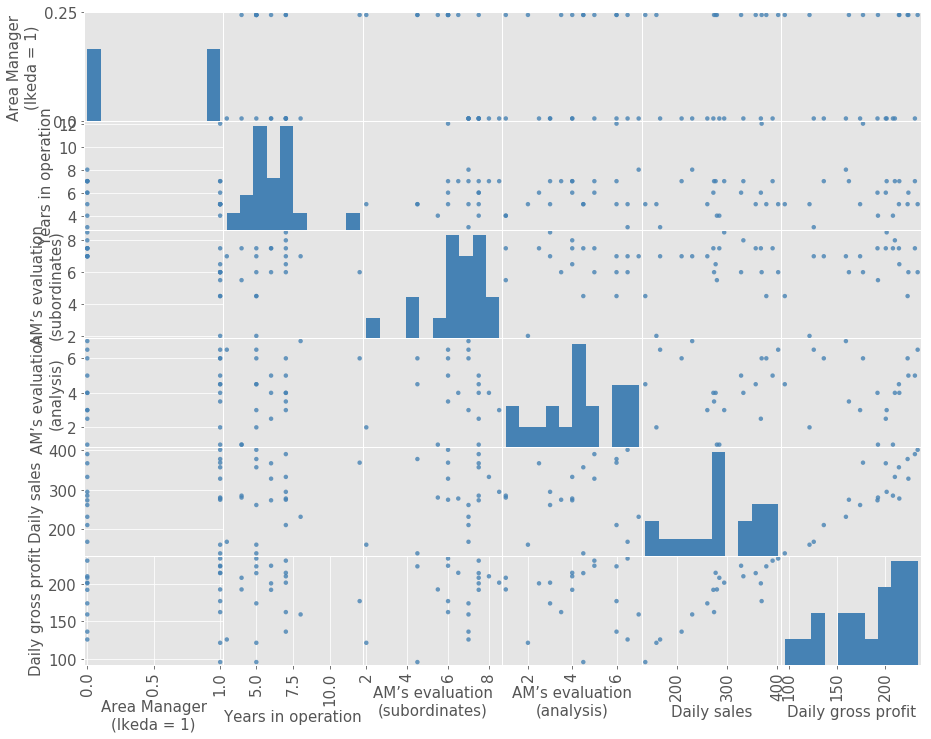

In [323]:
# https://stackoverflow.com/questions/43217174/how-can-the-sizes-and-rotations-of-text-of-a-pandas-scatter-matrix-be-set?rq=1
# https://stackoverflow.com/questions/41023207/pandas-scatter-matrix-change-axis-ticks-labels-is-not-working
# https://stackoverflow.com/questions/32121381/label-size-in-panda-plot-scatter-matrix
# https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame
# https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
# https://stackoverflow.com/questions/26101831/the-tick-label-in-scatterplot-with-pandas-is-not-drawn-correctly


# ダミー変数作成
# https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

# x = 0 
df_scatter = pd.concat([df.iloc[:,1:1+4],df.iloc[:,-2:]],axis=1)
display(df_scatter.head())

print (df_scatter.columns)
df_scatter.columns = ['Area Manager\n(Ikeda = 1)', 'Years in operation',
       'AM’s evaluation\n(subordinates)',
       'AM’s evaluation\n(analysis)',
       'Daily sales', 'Daily gross profit']

df_scatter['Area Manager\n(Ikeda = 1)'] = pd.get_dummies(df_scatter['Area Manager\n(Ikeda = 1)'])['Ikeda'].astype(int)
display(df_scatter.head())

# ['Area Manager (Ikeda or Sato)', 'Years in operation',
#        'AM’s evaluation of Store Manager’s training of subordinates (out of 10)',
#        'AM’s evaluation of Store Manager’s analysis ability (out of 10)',
#        'AM’s evaluation of Store Manager’s strength of mindset (out of 10)',
#        'Daily sales (1,000 yen)', 'Daily gross profit (1,000 yen)'],

% matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(111)

ax = ax1


# MEDVをDataFrameの先頭に移動する。
# y_var = "MEDV"
# x_var = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
# df_scatter = df[[y_var]+x_var]

# ax.tick_params(axis='x',labelsize=15,labelcolor='black')
# ax.tick_params(axis='y',labelsize=15,labelcolor='black')
# ax.set_xlabel('',fontsize=19)
# ax.set_ylabel('',fontsize=19)
# scatter_matrix = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80, figsize=(10,10))

# for ax in scatter_matrix.ravel():
#     ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
#     ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)
#     print (ax.get_xticklabels())


#     ax.set_xticklabels(ax.get_xticklabels(), fontsize = 80)

# Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80, figsize=(10,10))
Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80, hist_kwds={'color':['steelblue']},color='steelblue')
# Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80,color='steelblue')

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 15) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 15) for item in Axes.ravel()]
# plt.show()

# autoscale = True# We want the 0,0th item's y-axis to autoscale
# for ax in Axes[:,0]: # the left boundary
#     ax.grid('off', axis='both')
#     if autoscale == True:     
# #         ax.set_yticks([0, 1])
#         ax.set_autoscale_on(True)
#         autoscale = False
#     else:
#         ax.set_yticks([0, 0.5])
# #         ax.set_autoscale_on(True)
# #         autoscale = False
ax = Axes[:,0][0] 
ax.set_autoscale_on(False)
ax.grid('off',axis='both')
ax.set_yticks([0,15])

#### 1 #####

,AM’s evaluation of Store Manager’s strength of mindset (out of 10),AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),Store space (sq. meters),"Land cost (10,000 yen/sq meters)","Daily sales (1,000 yen)","Daily gross profit (1,000 yen)"
0,5.5,6.0,29.5,26.0,368.75,177.0
1,7.0,5.0,36.5,28.8,401.50,233.6
2,7.5,3.0,40.0,20.8,328.00,224.0
3,4.5,2.0,20.0,23.8,138.00,96.0
4,6.0,7.0,34.0,24.0,357.00,214.2


Index(['AM’s evaluation of Store Manager’s strength of mindset (out of 10)',
       'AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10)',
       'Store space (sq. meters)', 'Land cost (10,000 yen/sq meters)',
       'Daily sales (1,000 yen)', 'Daily gross profit (1,000 yen)'],
      dtype='object')


,AM’s evaluation (mindset),AM’s evaluation (goals),Store space,Land cost,Daily sales,Daily gross profit
0,5.5,6.0,29.5,26.0,368.75,177.0
1,7.0,5.0,36.5,28.8,401.50,233.6
2,7.5,3.0,40.0,20.8,328.00,224.0
3,4.5,2.0,20.0,23.8,138.00,96.0
4,6.0,7.0,34.0,24.0,357.00,214.2


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[[None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None]]

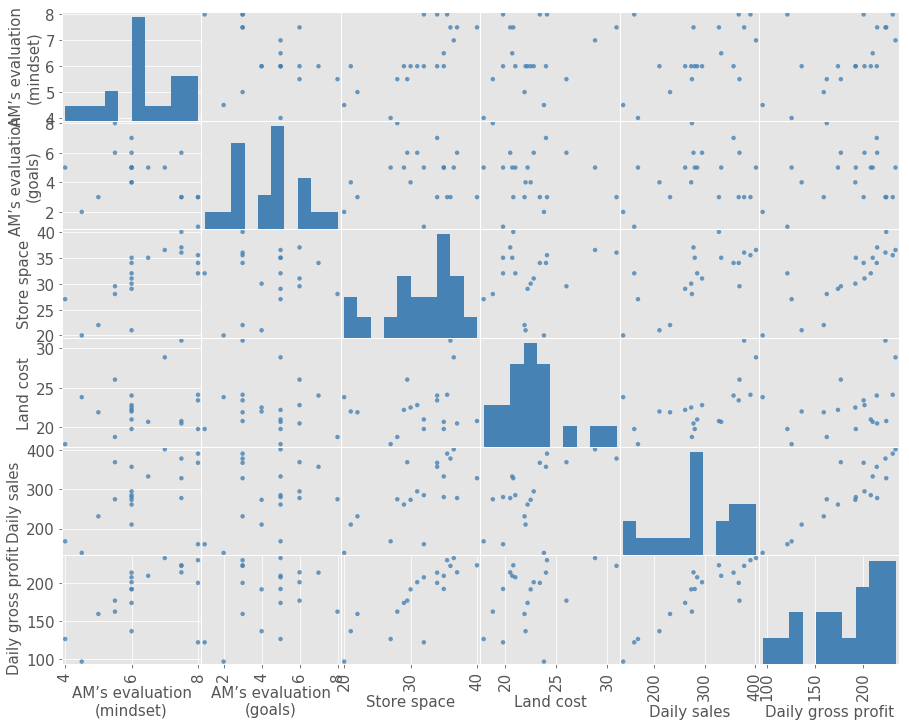

In [324]:
# https://stackoverflow.com/questions/43217174/how-can-the-sizes-and-rotations-of-text-of-a-pandas-scatter-matrix-be-set?rq=1
# https://stackoverflow.com/questions/41023207/pandas-scatter-matrix-change-axis-ticks-labels-is-not-working
# https://stackoverflow.com/questions/32121381/label-size-in-panda-plot-scatter-matrix
# https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame

# ダミー変数作成
# https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

# x = 0 
df_scatter = pd.concat([df.iloc[:,5:5+4],df.iloc[:,-2:]],axis=1)
display(df_scatter.head())

print (df_scatter.columns)
df_scatter.columns = ['AM’s evaluation\n(mindset)',
       'AM’s evaluation\n(goals)',
       'Store space','Land cost',
       'Daily sales', 'Daily gross profit']
                      
# df_scatter['Area Manager'] = pd.get_dummies(df_scatter['Area Manager'])['Ikeda']
display(df_scatter.head())


% matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(111)

ax = ax1



# Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80, figsize=(10,10))
Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80, hist_kwds={'color':['steelblue']},color='steelblue')
# Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80,color='steelblue')

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 15) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 15) for item in Axes.ravel()]
# plt.show()

#### --- 2 #####

,Distance to nearest station (in minutes),Population in trading zone,"Average annual household income in trading zone (10,000 yen)",No. of competitor stores (indep-endent),"Daily sales (1,000 yen)","Daily gross profit (1,000 yen)"
0,7.0,24000.0,900.0,8.0,368.75,177.0
1,3.5,18000.0,850.0,6.0,401.50,233.6
2,10.0,18500.0,800.0,3.0,328.00,224.0
3,6.0,15500.0,850.0,2.0,138.00,96.0
4,9.0,16000.0,850.0,5.0,357.00,214.2


Index(['Distance to nearest station (in minutes)',
       'Population in trading zone',
       'Average annual household income in trading zone (10,000 yen)',
       'No. of competitor stores (indep-endent)', 'Daily sales (1,000 yen)',
       'Daily gross profit (1,000 yen)'],
      dtype='object')


,Distance to nearest station,Population in trading zone,Average annual household income,No. of competitor stores ),Daily sales,Daily gross profit
0,7.0,24000.0,900.0,8.0,368.75,177.0
1,3.5,18000.0,850.0,6.0,401.50,233.6
2,10.0,18500.0,800.0,3.0,328.00,224.0
3,6.0,15500.0,850.0,2.0,138.00,96.0
4,9.0,16000.0,850.0,5.0,357.00,214.2


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[[None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None]]

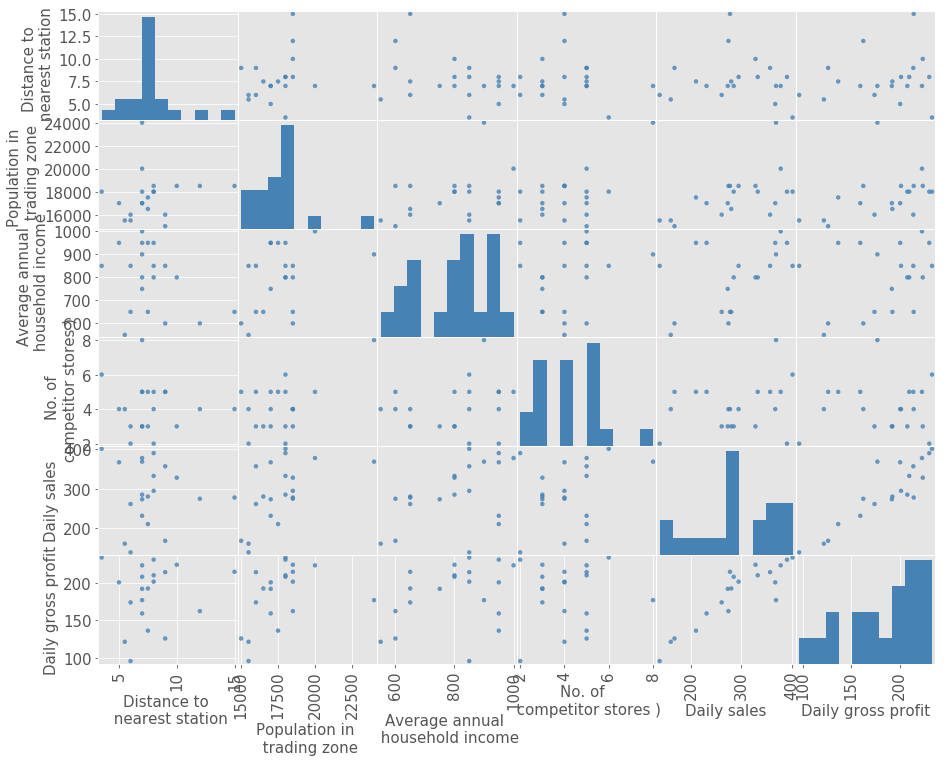

In [325]:
# https://stackoverflow.com/questions/43217174/how-can-the-sizes-and-rotations-of-text-of-a-pandas-scatter-matrix-be-set?rq=1
# https://stackoverflow.com/questions/41023207/pandas-scatter-matrix-change-axis-ticks-labels-is-not-working
# https://stackoverflow.com/questions/32121381/label-size-in-panda-plot-scatter-matrix
# https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame

# ダミー変数作成
# https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

# x = 0 
df_scatter = pd.concat([df.iloc[:,9:9+4],df.iloc[:,-2:]],axis=1)
display(df_scatter.head())

print (df_scatter.columns)
df_scatter.columns = ['Distance to \n nearest station',
       'Population in \n trading zone',
       'Average annual \n household income',
       'No. of  \n competitor stores )',
       'Daily sales', 'Daily gross profit']
                      
# df_scatter['Area Manager'] = pd.get_dummies(df_scatter['Area Manager'])['Ikeda']
display(df_scatter.head())


% matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(111)

ax = ax1



# Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80, figsize=(10,10))
Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80, hist_kwds={'color':['steelblue']},color='steelblue')
# Axes = pd.plotting.scatter_matrix(df_scatter,ax=ax,alpha=0.8,s=80,color='steelblue')

#y ticklabels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#x ticklabels
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 15) for item in Axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 15) for item in Axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 15) for item in Axes.ravel()]
# plt.show()


## ---- 3 -----

In [326]:
# https://www.kaggle.com/jayantik/multiple-linear-regression-backward-elimination

# 重回帰分析
import statsmodels.formula.api as sm
# https://stackoverflow.com/questions/38836465/how-to-get-the-regression-intercept-using-statsmodels-api
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

import statsmodels 

df_ols = df

df_ols.columns

y = df_ols.iloc[:,-1]
# x = df_ols.iloc[:,[1,2,3]].values
# x

x = df_ols[["AM’s evaluation of Store Manager’s analysis ability (out of 10)",
 "AM’s evaluation of Store Manager’s strength of mindset (out of 10)",
 'Store space (sq. meters)', 'Land cost (10,000 yen/sq meters)','Population in trading zone']]


# 切片を追加
x =  statsmodels.tools.add_constant(x)


x.head()

,const,AM’s evaluation of Store Manager’s analysis ability (out of 10),AM’s evaluation of Store Manager’s strength of mindset (out of 10),Store space (sq. meters),"Land cost (10,000 yen/sq meters)",Population in trading zone
0,1.0,6.0,5.5,29.5,26.0,24000.0
1,1.0,6.5,7.0,36.5,28.8,18000.0
2,1.0,5.0,7.5,40.0,20.8,18500.0
3,1.0,4.5,4.5,20.0,23.8,15500.0
4,1.0,4.5,6.0,34.0,24.0,16000.0


In [327]:
# X_train = x
# y_train = y

# # Fitting Multiple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()

# regressor.fit(X_train, y_train)

In [328]:
# Predicting the Test set results
# y_pred = regressor.predict(X_test)
# Building Optimal Model using Backward Elimination
# import statsmodels.formula.api as sm
# X_opt = X
regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Daily gross profit (1,000 yen)   R-squared:                       0.764
Model:                                        OLS   Adj. R-squared:                  0.680
Method:                             Least Squares   F-statistic:                     9.057
Date:                            Sat, 16 Mar 2019   Prob (F-statistic):           0.000516
Time:                                    15:23:29   Log-Likelihood:                -87.104
No. Observations:                              20   AIC:                             186.2
Df Residuals:                                  14   BIC:                             192.2
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                                -84.7532     53.202     -1.593      0.133    -198.860      29.353
AM’s evaluation of Store Manager’s analysis ability (out of 10)        0.2860      3.490      0.082      0.936      -7.199       7.771
AM’s evaluation of Store Manager’s strength of mindset (out of 10)    -3.6890      6.828     -0.540      0.597     -18.334      10.956
Store space (sq. meters)                                               6.0591      1.415      4.281      0.001       3.024       9.094
Land cost (10,000 yen/sq meters)                                       2.7032      2.085      1.297      0.216      -1.768       7.175
Population in trading zone                                             0.0024      0.003      0.774      0.452      -0.004       0.009
==============================================================================
Omnibus:                        3.743   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.352
Skew:                          -0.836   Prob(JB):                        0.309
Kurtosis:                       3.156   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [329]:
# 残差 residuals
# # statsmodels.tools.eval_measures.mse(x,y,axis=0)
# print (regressor_OLS.mse_model)
# print (np.sqrt(sum((x-y)**2)))
# print (x)
# print (y)
# print (x-y)
# print ((x-y)**2)

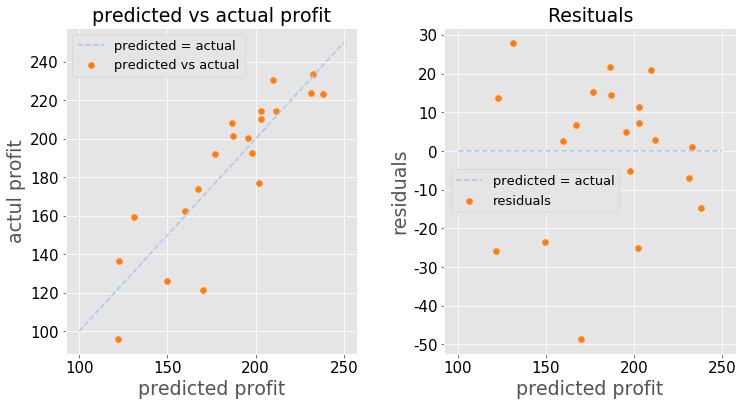

In [330]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
# https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.mse.html

cmap = plt.get_cmap('tab20') # tableau colorに設定

#  https://stackoverflow.com/questions/35417111/python-how-to-evaluate-the-residuals-in-statsmodels
x = regressor_OLS.fittedvalues
y = df.iloc[:,-1]
resi = y-x


#●リスト4.5.10：配給種別・ジャンル別棒グラフの描画
fig = plt.figure(figsize=(12, 6))


# サブプロット間余⽩調整 スペース 空白
fig.subplots_adjust(wspace=0.3, hspace=0.8)


ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(222)


ax = ax1
# y = graphDf.index

# df.iloc[:,:1].plot(ax=ax)
# df_rsq.plot(ax=ax)
ax.scatter(x,y,label='predicted vs actual',color=cmap(2))

# predict = actual
xList = np.arange(100,300,50)
ax.plot(xList,xList,label='predicted = actual',color=cmap(1),linestyle='--')


ax.tick_params(axis='x',labelsize=15,labelcolor='black')
ax.tick_params(axis='y',labelsize=15,labelcolor='black')
leg = ax.legend(framealpha=1, loc='best',fontsize=13)
ax.set_xlabel('predicted profit',fontsize=19)
ax.set_ylabel('actul profit',fontsize=19)
ax.set_title('predicted vs actual profit',fontsize=19)
# ax.set_ylim(0,300)
# ax.set_xlim(0,300)
#y軸をカンマ区切り
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: '{:0,.0f}'.format(y)))


#----------
ax2 = fig.add_subplot(122)
#ax2 = fig.add_subplot(222)


ax = ax2
# y = graphDf.index

# df.iloc[:,:1].plot(ax=ax)
# df_rsq.plot(ax=ax)
ax.scatter(x,resi,label='residuals',color=cmap(2))

# predict = actual
xList = np.arange(100,300,50)
ax.plot(xList,[0 for x in xList],label='predicted = actual',color=cmap(1),linestyle='--')


ax.tick_params(axis='x',labelsize=15,labelcolor='black')
ax.tick_params(axis='y',labelsize=15,labelcolor='black')
leg = ax.legend(framealpha=1, loc='best',fontsize=13)
ax.set_xlabel('predicted profit',fontsize=19)
ax.set_ylabel('residuals',fontsize=19)
ax.set_title('Resituals',fontsize=19)
# ax.set_ylim(0,300)
# ax.set_xlim(0,300)
#y軸をカンマ区切り
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: '{:0,.0f}'.format(y)))

# Backward regression 変数減少法

In [331]:
df.columns

Index(['Store', 'Area Manager (Ikeda or Sato)', 'Years in operation',
       'AM’s evaluation of Store Manager’s training of subordinates (out of 10)',
       'AM’s evaluation of Store Manager’s analysis ability (out of 10)',
       'AM’s evaluation of Store Manager’s strength of mindset (out of 10)',
       'AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10)',
       'Store space (sq. meters)', 'Land cost (10,000 yen/sq meters)',
       'Distance to nearest station (in minutes)',
       'Population in trading zone',
       'Average annual household income in trading zone (10,000 yen)',
       'No. of competitor stores (indep-endent)',
       'No. of competitor stores (franchise or chain)',
       'Daily sales (1,000 yen)', 'Daily gross profit (1,000 yen)'],
      dtype='object')

In [332]:
# 重回帰分析
import statsmodels.formula.api as sm

import statsmodels 
df_ols = df
df_ols.columns

y = df_ols.iloc[:,-1]

x = df_ols.drop(['Daily gross profit (1,000 yen)','Store'],axis=1) #目的変数のprofitと､ラベルStoreを除く

x['Area Manager (Ikeda or Sato)'] = pd.get_dummies(x['Area Manager (Ikeda or Sato)'])['Ikeda'].astype(int)

# 切片を追加
x =  statsmodels.tools.add_constant(x)



x = x.drop(['Daily sales (1,000 yen)'],axis=1) #salesを除く

## R確認用データフレーム作成
df_rsq = pd.DataFrame([],columns = ['Removed Column','Adj. R-squared'])




# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
# display(regressor_OLS.summary())

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series(['None (All columns) ',regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####


print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values
# remove_next = pval_df[['p-values']].idxmax().values

,p-values
const,0.1037
Area Manager (Ikeda or Sato),0.9250
Years in operation,0.9934
AM’s evaluation of Store Manager’s training of subordinates (out of 10),0.8252
AM’s evaluation of Store Manager’s analysis ability (out of 10),0.5094
AM’s evaluation of Store Manager’s strength of mindset (out of 10),0.9159
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),0.5111
Store space (sq. meters),0.0459
"Land cost (10,000 yen/sq meters)",0.9638
Distance to nearest station (in minutes),0.6287


,Removed Column,Adj. R-squared
0,None (All columns),0.8632


Adj. R-squared: 0.8632


,p-values
Years in operation,0.9934


In [333]:
# 2回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values



,p-values
const,0.0521
Area Manager (Ikeda or Sato),0.8953
AM’s evaluation of Store Manager’s training of subordinates (out of 10),0.7449
AM’s evaluation of Store Manager’s analysis ability (out of 10),0.4605
AM’s evaluation of Store Manager’s strength of mindset (out of 10),0.8742
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),0.4080
Store space (sq. meters),0.0066
"Land cost (10,000 yen/sq meters)",0.9601
Distance to nearest station (in minutes),0.5747
Population in trading zone,0.9312


,Removed Column,Adj. R-squared
0,None (All columns),0.8632
1,[Years in operation],0.8828


Adj. R-squared: 0.8828


,p-values
"Land cost (10,000 yen/sq meters)",0.9601


In [334]:
# 3回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values


,p-values
const,0.0088
Area Manager (Ikeda or Sato),0.8926
AM’s evaluation of Store Manager’s training of subordinates (out of 10),0.7259
AM’s evaluation of Store Manager’s analysis ability (out of 10),0.2950
AM’s evaluation of Store Manager’s strength of mindset (out of 10),0.8681
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),0.3512
Store space (sq. meters),0.0015
Distance to nearest station (in minutes),0.3316
Population in trading zone,0.9077
"Average annual household income in trading zone (10,000 yen)",0.1517


,Removed Column,Adj. R-squared
0,None (All columns),0.8632
1,[Years in operation],0.8828
2,"[Land cost (10,000 yen/sq meters)]",0.8974


Adj. R-squared: 0.8974


,p-values
Population in trading zone,0.9077


In [335]:
# 4回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values



,p-values
const,0.0016
Area Manager (Ikeda or Sato),0.8786
AM’s evaluation of Store Manager’s training of subordinates (out of 10),0.7034
AM’s evaluation of Store Manager’s analysis ability (out of 10),0.2453
AM’s evaluation of Store Manager’s strength of mindset (out of 10),0.8241
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),0.3011
Store space (sq. meters),0.0005
Distance to nearest station (in minutes),0.2718
"Average annual household income in trading zone (10,000 yen)",0.1218
No. of competitor stores (indep-endent),0.7697


,Removed Column,Adj. R-squared
0,None (All columns),0.8632
1,[Years in operation],0.8828
2,"[Land cost (10,000 yen/sq meters)]",0.8974
3,[Population in trading zone],0.9086


Adj. R-squared: 0.9086


,p-values
Area Manager (Ikeda or Sato),0.8786


In [336]:
# 5回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values


,p-values
const,6.4018e-04
AM’s evaluation of Store Manager’s training of subordinates (out of 10),1.1581e-01
AM’s evaluation of Store Manager’s analysis ability (out of 10),2.2341e-01
AM’s evaluation of Store Manager’s strength of mindset (out of 10),7.7402e-01
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),1.4209e-01
Store space (sq. meters),5.2213e-05
Distance to nearest station (in minutes),1.9514e-01
"Average annual household income in trading zone (10,000 yen)",3.3868e-02
No. of competitor stores (indep-endent),7.9177e-01
No. of competitor stores (franchise or chain),1.6043e-01


,Removed Column,Adj. R-squared
0,None (All columns),0.8632
1,[Years in operation],0.8828
2,"[Land cost (10,000 yen/sq meters)]",0.8974
3,[Population in trading zone],0.9086
4,[Area Manager (Ikeda or Sato)],0.9175


Adj. R-squared: 0.9175


,p-values
No. of competitor stores (indep-endent),0.7918


In [337]:
# 6回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values



,p-values
const,3.2955e-04
AM’s evaluation of Store Manager’s training of subordinates (out of 10),7.2565e-02
AM’s evaluation of Store Manager’s analysis ability (out of 10),2.0566e-01
AM’s evaluation of Store Manager’s strength of mindset (out of 10),8.2559e-01
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),5.1397e-02
Store space (sq. meters),1.5701e-05
Distance to nearest station (in minutes),1.8231e-01
"Average annual household income in trading zone (10,000 yen)",2.4065e-02
No. of competitor stores (franchise or chain),3.6078e-02


,Removed Column,Adj. R-squared
0,None (All columns),0.8632
1,[Years in operation],0.8828
2,"[Land cost (10,000 yen/sq meters)]",0.8974
3,[Population in trading zone],0.9086
4,[Area Manager (Ikeda or Sato)],0.9175
5,[No. of competitor stores (indep-endent)],0.9245


Adj. R-squared: 0.9245


,p-values
AM’s evaluation of Store Manager’s strength of mindset (out of 10),0.8256


In [338]:
# 7回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values


## precision check
regressor_OLS.summary()

,p-values
const,1.4666e-04
AM’s evaluation of Store Manager’s training of subordinates (out of 10),6.0773e-02
AM’s evaluation of Store Manager’s analysis ability (out of 10),1.9214e-01
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),3.2450e-02
Store space (sq. meters),1.6979e-08
Distance to nearest station (in minutes),1.6860e-01
"Average annual household income in trading zone (10,000 yen)",1.1736e-02
No. of competitor stores (franchise or chain),2.5007e-02


,Removed Column,Adj. R-squared
0,None (All columns),0.8632
1,[Years in operation],0.8828
2,"[Land cost (10,000 yen/sq meters)]",0.8974
3,[Population in trading zone],0.9086
4,[Area Manager (Ikeda or Sato)],0.9175
5,[No. of competitor stores (indep-endent)],0.9245
6,[AM’s evaluation of Store Manager’s strength o...,0.9305


Adj. R-squared: 0.9305


,p-values
AM’s evaluation of Store Manager’s analysis ability (out of 10),0.1921


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Daily gross profit (1,000 yen)   R-squared:                       0.956
Model:                                        OLS   Adj. R-squared:                  0.930
Method:                             Least Squares   F-statistic:                     37.32
Date:                            Sat, 16 Mar 2019   Prob (F-statistic):           3.25e-07
Time:                                    15:23:30   Log-Likelihood:                -70.283
No. Observations:                              20   AIC:                             156.6
Df Residuals:                                  12   BIC:                             164.5
Df Model:                                       7                                         
Covariance Type:                        nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -128.0468     23.477     -5.454      0.000    -179.198     -76.896
AM’s evaluation of Store Manager’s training of subordinates (out of 10)       4.5476      2.198      2.069      0.061      -0.241       9.336
AM’s evaluation of Store Manager’s analysis ability (out of 10)               2.6919      1.948      1.382      0.192      -1.552       6.936
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10)     4.6799      1.936      2.418      0.032       0.462       8.897
Store space (sq. meters)                                                      6.1614      0.468     13.174      0.000       5.142       7.180
Distance to nearest station (in minutes)                                     -1.9700      1.345     -1.465      0.169      -4.900       0.960
Average annual household income in trading zone (10,000 yen)                  0.0776      0.026      2.968      0.012       0.021       0.134
No. of competitor stores (franchise or chain)                                 7.0633      2.759      2.560      0.025       1.051      13.075
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.189
Skew:                           0.212   Prob(JB):                        0.910
Kurtosis:                       3.220   Cond. No.                     8.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

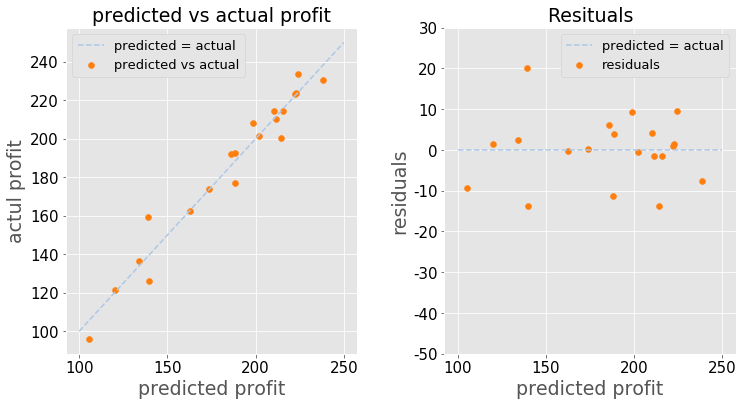

In [340]:
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html
# https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.mse.html

cmap = plt.get_cmap('tab20') # tableau colorに設定

#  https://stackoverflow.com/questions/35417111/python-how-to-evaluate-the-residuals-in-statsmodels
x = regressor_OLS.fittedvalues
y = df.iloc[:,-1]
resi = y-x


#●リスト4.5.10：配給種別・ジャンル別棒グラフの描画
fig = plt.figure(figsize=(12, 6))


# サブプロット間余⽩調整 スペース 空白
fig.subplots_adjust(wspace=0.3, hspace=0.8)


ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(222)


ax = ax1
# y = graphDf.index

# df.iloc[:,:1].plot(ax=ax)
# df_rsq.plot(ax=ax)
ax.scatter(x,y,label='predicted vs actual',color=cmap(2))

# predict = actual
xList = np.arange(100,300,50)
ax.plot(xList,xList,label='predicted = actual',color=cmap(1),linestyle='--')


ax.tick_params(axis='x',labelsize=15,labelcolor='black')
ax.tick_params(axis='y',labelsize=15,labelcolor='black')
leg = ax.legend(framealpha=1, loc='best',fontsize=13)
ax.set_xlabel('predicted profit',fontsize=19)
ax.set_ylabel('actul profit',fontsize=19)
ax.set_title('predicted vs actual profit',fontsize=19)
# ax.set_ylim(0,300)
# ax.set_xlim(0,300)
#y軸をカンマ区切り
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: '{:0,.0f}'.format(y)))


#----------
ax2 = fig.add_subplot(122)
#ax2 = fig.add_subplot(222)


ax = ax2
# y = graphDf.index

# df.iloc[:,:1].plot(ax=ax)
# df_rsq.plot(ax=ax)
ax.scatter(x,resi,label='residuals',color=cmap(2))

# predict = actual
xList = np.arange(100,300,50)
ax.plot(xList,[0 for x in xList],label='predicted = actual',color=cmap(1),linestyle='--')


ax.tick_params(axis='x',labelsize=15,labelcolor='black')
ax.tick_params(axis='y',labelsize=15,labelcolor='black')
leg = ax.legend(framealpha=1, loc='best',fontsize=13)
ax.set_xlabel('predicted profit',fontsize=19)
ax.set_ylabel('residuals',fontsize=19)
ax.set_title('Resituals',fontsize=19)
ax.set_ylim(-50,30)
# ax.set_xlim(0,300)
#y軸をカンマ区切り
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: '{:0,.0f}'.format(y)))

In [180]:
# 8回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values



,p-values
const,1.42e-04
AM’s evaluation of Store Manager’s training of subordinates (out of 10),7.18e-02
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),3.55e-02
Store space (sq. meters),8.19e-09
Distance to nearest station (in minutes),3.66e-01
"Average annual household income in trading zone (10,000 yen)",6.24e-04
No. of competitor stores (franchise or chain),5.75e-02


,Removed Column,Adj. R-squared
0,None (All columns),0.86
1,[Years in operation],0.88
2,"[Land cost (10,000 yen/sq meters)]",0.90
3,[Population in trading zone],0.91
4,[Area Manager (Ikeda or Sato)],0.92
5,[No. of competitor stores (indep-endent)],0.92
6,[AM’s evaluation of Store Manager’s strength o...,0.93
7,[AM’s evaluation of Store Manager’s analysis a...,0.93


Adj. R-squared: 0.9256


,p-values
Distance to nearest station (in minutes),0.37


In [181]:
# 9回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values



,p-values
const,3.11e-05
AM’s evaluation of Store Manager’s training of subordinates (out of 10),6.49e-02
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),4.84e-02
Store space (sq. meters),3.30e-09
"Average annual household income in trading zone (10,000 yen)",2.45e-04
No. of competitor stores (franchise or chain),7.81e-02


,Removed Column,Adj. R-squared
0,None (All columns),0.86
1,[Years in operation],0.88
2,"[Land cost (10,000 yen/sq meters)]",0.90
3,[Population in trading zone],0.91
4,[Area Manager (Ikeda or Sato)],0.92
5,[No. of competitor stores (indep-endent)],0.92
6,[AM’s evaluation of Store Manager’s strength o...,0.93
7,[AM’s evaluation of Store Manager’s analysis a...,0.93
8,[Distance to nearest station (in minutes)],0.93


Adj. R-squared: 0.9262


,p-values
No. of competitor stores (franchise or chain),0.08


In [182]:
# 10回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values



,p-values
const,5.62e-05
AM’s evaluation of Store Manager’s training of subordinates (out of 10),2.91e-02
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),7.03e-02
Store space (sq. meters),3.48e-09
"Average annual household income in trading zone (10,000 yen)",5.28e-04


,Removed Column,Adj. R-squared
0,None (All columns),0.86
1,[Years in operation],0.88
2,"[Land cost (10,000 yen/sq meters)]",0.90
3,[Population in trading zone],0.91
4,[Area Manager (Ikeda or Sato)],0.92
5,[No. of competitor stores (indep-endent)],0.92
6,[AM’s evaluation of Store Manager’s strength o...,0.93
7,[AM’s evaluation of Store Manager’s analysis a...,0.93
8,[Distance to nearest station (in minutes)],0.93
9,[No. of competitor stores (franchise or chain)],0.91


Adj. R-squared: 0.9134


,p-values
AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10),0.07


In [183]:
# 11回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values


,p-values
const,1.94e-04
AM’s evaluation of Store Manager’s training of subordinates (out of 10),7.72e-04
Store space (sq. meters),4.10e-09
"Average annual household income in trading zone (10,000 yen)",2.26e-03


,Removed Column,Adj. R-squared
0,None (All columns),0.86
1,[Years in operation],0.88
2,"[Land cost (10,000 yen/sq meters)]",0.90
3,[Population in trading zone],0.91
4,[Area Manager (Ikeda or Sato)],0.92
5,[No. of competitor stores (indep-endent)],0.92
6,[AM’s evaluation of Store Manager’s strength o...,0.93
7,[AM’s evaluation of Store Manager’s analysis a...,0.93
8,[Distance to nearest station (in minutes)],0.93
9,[No. of competitor stores (franchise or chain)],0.91


Adj. R-squared: 0.8983


,p-values
"Average annual household income in trading zone (10,000 yen)",2.26e-03


In [184]:
# 12回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values



,p-values
const,2.18e-02
AM’s evaluation of Store Manager’s training of subordinates (out of 10),6.19e-04
Store space (sq. meters),1.47e-07


,Removed Column,Adj. R-squared
0,None (All columns),0.86
1,[Years in operation],0.88
2,"[Land cost (10,000 yen/sq meters)]",0.90
3,[Population in trading zone],0.91
4,[Area Manager (Ikeda or Sato)],0.92
5,[No. of competitor stores (indep-endent)],0.92
6,[AM’s evaluation of Store Manager’s strength o...,0.93
7,[AM’s evaluation of Store Manager’s analysis a...,0.93
8,[Distance to nearest station (in minutes)],0.93
9,[No. of competitor stores (franchise or chain)],0.91


Adj. R-squared: 0.8254


,p-values
const,0.02


In [185]:
# 13回目

x = x.drop(remove_next,axis=1)


# display(x.columns)

regressor_OLS = sm.OLS(endog =y, exog = x).fit()
regressor_OLS.summary()

pval_df = pd.DataFrame(regressor_OLS.pvalues,columns = ['p-values'])

# R確認用データフレームに追加
tmp_s = pd.Series([remove_next,regressor_OLS.rsquared_adj],index=df_rsq.columns)
# print (tmp_s)
df_rsq = df_rsq.append(tmp_s,ignore_index=True)

display(pval_df)
display(df_rsq)
#####

print ('Adj. R-squared: {0:,.4f}'.format(regressor_OLS.rsquared_adj))

display(pval_df.loc[pval_df[['p-values']].idxmax().values])
remove_next = pval_df.drop(['const'])[['p-values']].idxmax().values



,p-values
const,9.67e-01
Store space (sq. meters),7.15e-06


,Removed Column,Adj. R-squared
0,None (All columns),0.86
1,[Years in operation],0.88
2,"[Land cost (10,000 yen/sq meters)]",0.90
3,[Population in trading zone],0.91
4,[Area Manager (Ikeda or Sato)],0.92
5,[No. of competitor stores (indep-endent)],0.92
6,[AM’s evaluation of Store Manager’s strength o...,0.93
7,[AM’s evaluation of Store Manager’s analysis a...,0.93
8,[Distance to nearest station (in minutes)],0.93
9,[No. of competitor stores (franchise or chain)],0.91


Adj. R-squared: 0.6651


,p-values
const,0.97


,Removed Column,Adj. R-squared
0,None (All columns),0.8632
1,[Years in operation],0.8828
2,"[Land cost (10,000 yen/sq meters)]",0.8974
3,[Population in trading zone],0.9086
4,[Area Manager (Ikeda or Sato)],0.9175
5,[No. of competitor stores (indep-endent)],0.9245
6,[AM’s evaluation of Store Manager’s strength o...,0.9305
7,[AM’s evaluation of Store Manager’s analysis a...,0.9256
8,[Distance to nearest station (in minutes)],0.9262
9,[No. of competitor stores (franchise or chain)],0.9134


['None (All columns) ' array(['Years in operation'], dtype=object)
 array(['Land cost (10,000 yen/sq meters)'], dtype=object)
 array(['Population in trading zone'], dtype=object)
 array(['Area Manager (Ikeda or Sato)'], dtype=object)
 array(['No. of competitor stores (indep-endent)'], dtype=object)
 array(['AM’s evaluation of Store Manager’s strength of mindset (out of 10)'],
      dtype=object)
 array(['AM’s evaluation of Store Manager’s analysis ability (out of 10)'],
      dtype=object)
 array(['Distance to nearest station (in minutes)'], dtype=object)
 array(['No. of competitor stores (franchise or chain)'], dtype=object)
 array(['AM’s evaluation of Store Manager’s eagerness to achieve goals (out of 10)'],
      dtype=object)
 array(['Average annual household income in trading zone (10,000 yen)'],
      dtype=object)
 array(['AM’s evaluation of Store Manager’s training of subordinates (out of 10)'],
      dtype=object)]


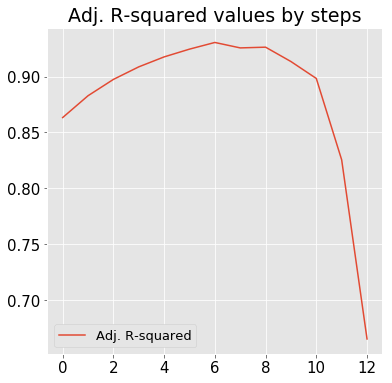

In [200]:
display(df_rsq)
print (df_rsq['Removed Column'].values)


# graphDf[['5','6','7']].reset_index().rename(columns={colStr:'Average annual sales'}) 
#●リスト4.5.10：配給種別・ジャンル別棒グラフの描画
fig = plt.figure(figsize=(6, 6))


# サブプロット間余⽩調整 スペース 空白
# fig.subplots_adjust(wspace=0.25, hspace=0.8)


ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(222)


ax = ax1
# y = graphDf.index

# df.iloc[:,:1].plot(ax=ax)
df_rsq.plot(ax=ax)

ax.tick_params(axis='x',labelsize=15,labelcolor='black')
ax.tick_params(axis='y',labelsize=15,labelcolor='black')
leg = ax.legend(framealpha=1, loc='best',fontsize=13)
ax.set_xlabel('',fontsize=19)
ax.set_ylabel('',fontsize=19)
ax.set_title('Adj. R-squared values by steps',fontsize=19)
# ax.set_ylim(0,20000*1.1)
#y軸をカンマ区切り
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda y, p: '{:0,.2f}'.format(y)))

